## Airline Passenger Satisfaction

Dataset Source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

#### Install Necessary Libraries

In [1]:
%pip install -U matplotlib
%pip install -U numpy
%pip install auto-sklearn seaborn sklearn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import Necessary Libraries

In [2]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import autosklearn
from autosklearn.classification import AutoSklearnClassifier

#### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Show Library Versions

In [4]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print("Auto-Sklearn :".rjust(n), autosklearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.10.1
           NumPy : 1.25.0
          Pandas : 1.5.3
         Sklearn : 0.24.2
    Auto-Sklearn : 0.15.0
         Seaborn : 0.12.2


### Initial Data Preprocessing

#### Ingest Dataset

In [5]:
col_names = ["Unnamed: 0",
             "id",
             "gender",
             "customer_type",
             "age",
             "travel_type",
             "seating_class",
             "flight_distance",
             "inflight_wifi",
             "departure_arrival_time_convenient",
             "ease_of_online_booking",
             "gate_location",
             "food_n_drink",
             "online_boarding",
             "seat_comfort",
             "inflight_entertainment",
             "on_board_service",
             "leg_room_service",
             "baggage_handling",
             "checkin_service",
             "inflight_service",
             "cleanliness",
             "departure_delay_in_minutes",
             "arrival_delay_in_minutes",
             "target"
             ]

data_types = {"Unnamed: 0": np.uint32,
              "id": np.uint32,
              "gender": str,
              "customer_type": str,
              "age": np.uint8,
              "travel_type": str,
              "seating_class": str,
              "flight_distance": np.float32,
              "inflight_wifi": np.uint8,
              "departure_arrival_time_convenient": np.uint8,
              "ease_of_online_booking": np.uint8,
              "gate_location": np.uint8,
              "food_n_drink": np.uint8,
              "online_boarding": np.uint8,
              "seat_comfort": np.uint8,
              "inflight_entertainment": np.uint8,
              "on_board_service": np.uint8,
              "leg_room_service": np.uint8,
              "baggage_handling": np.uint8,
              "checkin_service": np.uint8,
              "inflight_service": np.uint8,
              "cleanliness": np.uint8,
              "departure_delay_in_minutes": np.uint32,
              "arrival_delay_in_minutes": np.float32,
              "target": str}

data = pd.read_csv("/content/drive/MyDrive/Airline Passenger Satisfaction/data/train.csv",
                   names=col_names,
                   dtype=data_types,
                   engine='c',
                   header=0)

cols_to_drop = ["Unnamed: 0", "id"]

data = data.drop(columns=cols_to_drop)

data.head()

,gender,customer_type,age,travel_type,seating_class,flight_distance,inflight_wifi,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,target
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


#### More Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  uint8  
 3   travel_type                        103904 non-null  object 
 4   seating_class                      103904 non-null  object 
 5   flight_distance                    103904 non-null  float32
 6   inflight_wifi                      103904 non-null  uint8  
 7   departure_arrival_time_convenient  103904 non-null  uint8  
 8   ease_of_online_booking             103904 non-null  uint8  
 9   gate_location                      103904 non-null  uint8  
 10  food_n_drink                       103904 non-null  uint8  
 11  online_boarding                    1039

### Visualizations

#### Create Function to Visualize Features (Barplot)

In [7]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   sort_x_labels: int = 1
                   ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.
    - sort_x_labels: Sort the x-label values.

    Output:
    - A Bar Plot.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."

    ax = feature_to_visualize.value_counts().sort_index().plot.bar(
                                                      figsize=(12,8),
                                                      rot=0,
                                                      legend=False,
                                                      color=["lightgreen",
                                                             "blue",
                                                             "brown",
                                                             "lightblue",
                                                             "tan",
                                                             "yellow",
                                                             "orange",
                                                             "green",
                                                             "red",
                                                             "purple"]
                                                      )

    ax.bar_label(ax.containers[0])

    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

#### Dataset Visualization: Gender

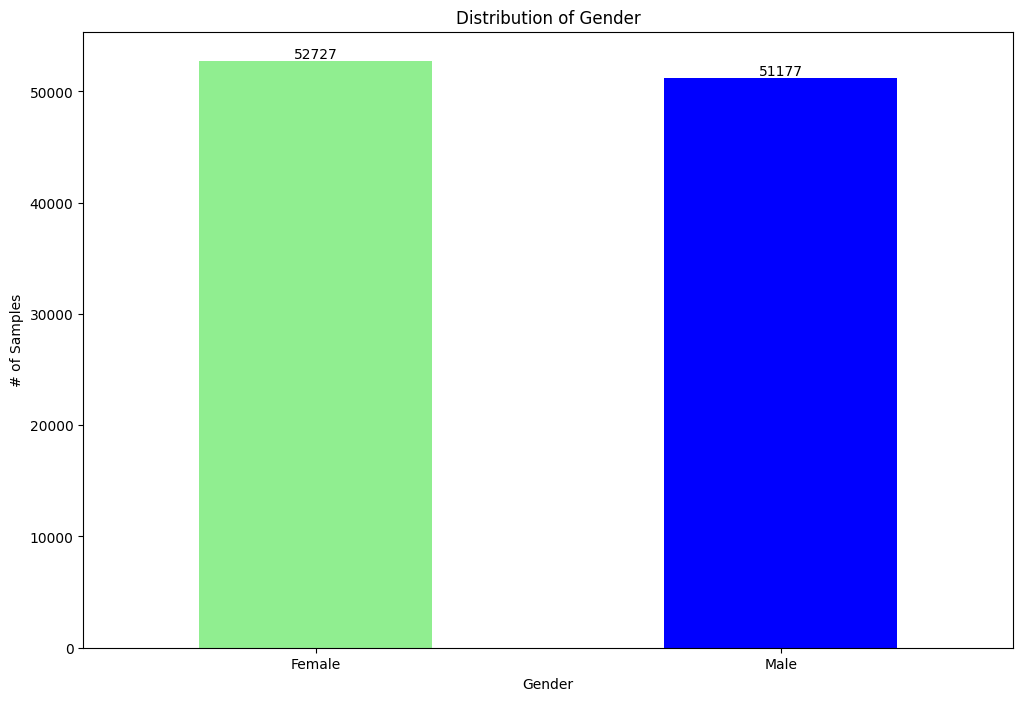

In [8]:
barplot_visual(data["gender"],
               "Distribution of Gender",
               "Gender",
               "# of Samples",
               sort_x_labels=0
               )

#### Dataset Visualization: Customer Type

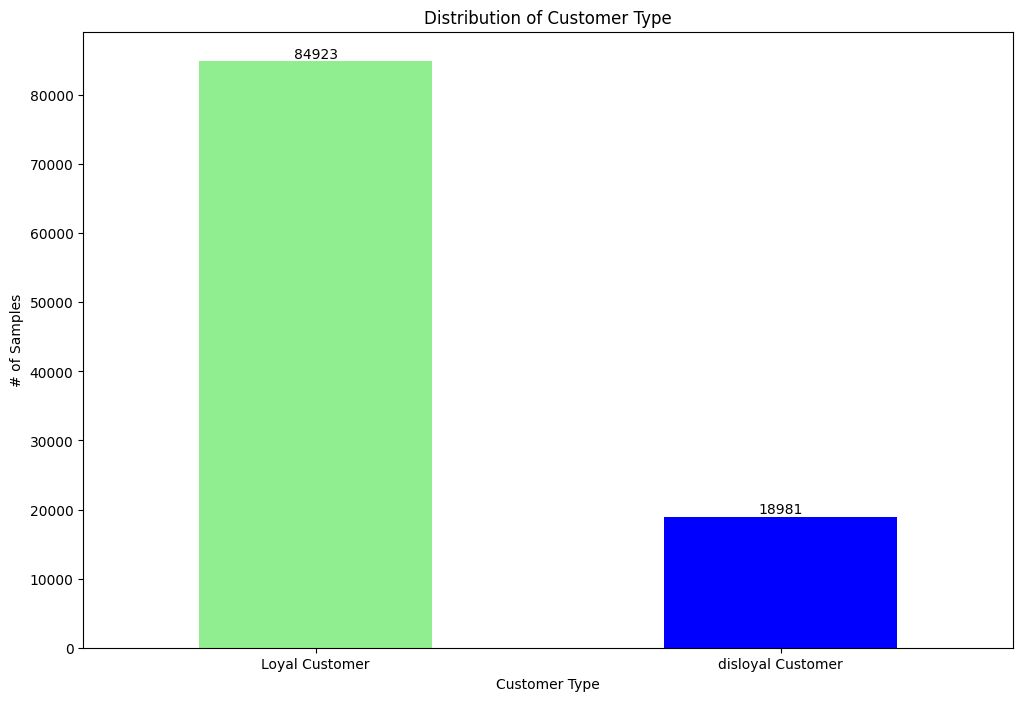

In [9]:
barplot_visual(data["customer_type"],
               "Distribution of Customer Type",
               "Customer Type",
               "# of Samples",
               )

#### Dataset Visualization: Travel Type

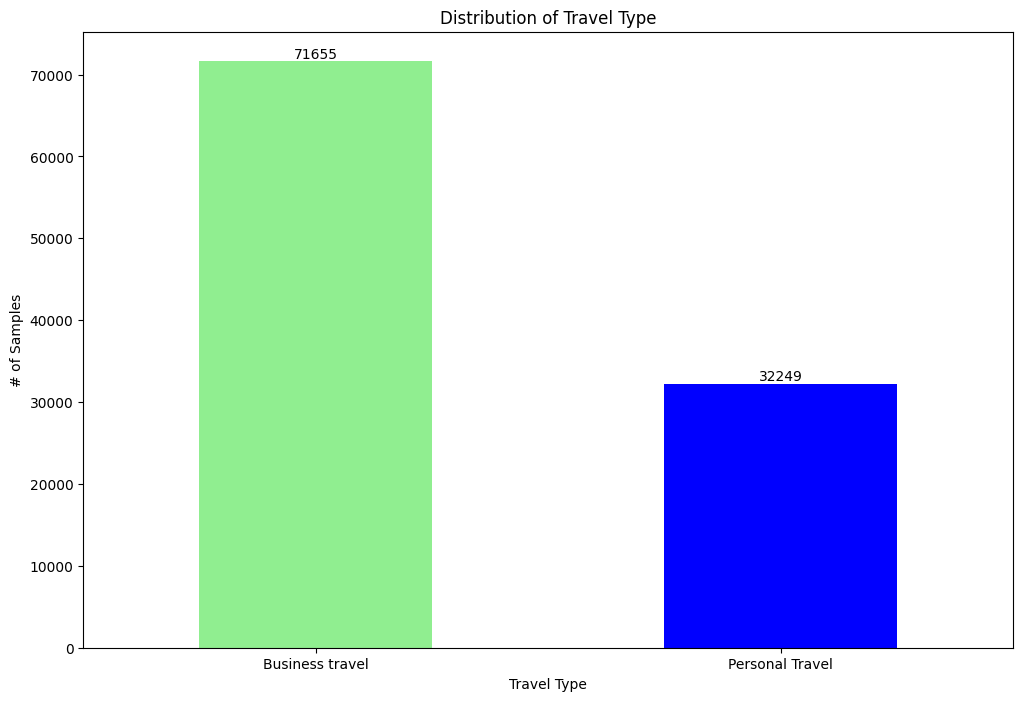

In [10]:
barplot_visual(data["travel_type"],
               "Distribution of Travel Type",
               "Travel Type",
               "# of Samples",
               )

#### Dataset Visualization: Seating Class

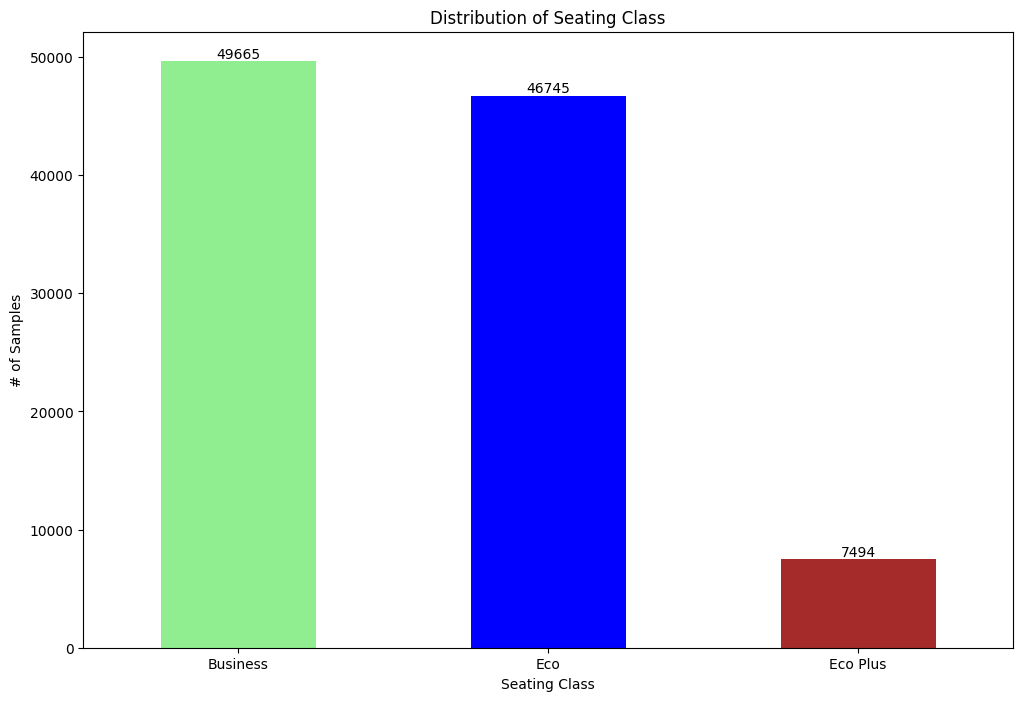

In [11]:
barplot_visual(data["seating_class"],
               "Distribution of Seating Class",
               "Seating Class",
               "# of Samples",
               )

#### Dataset Visualization: Target Distribution

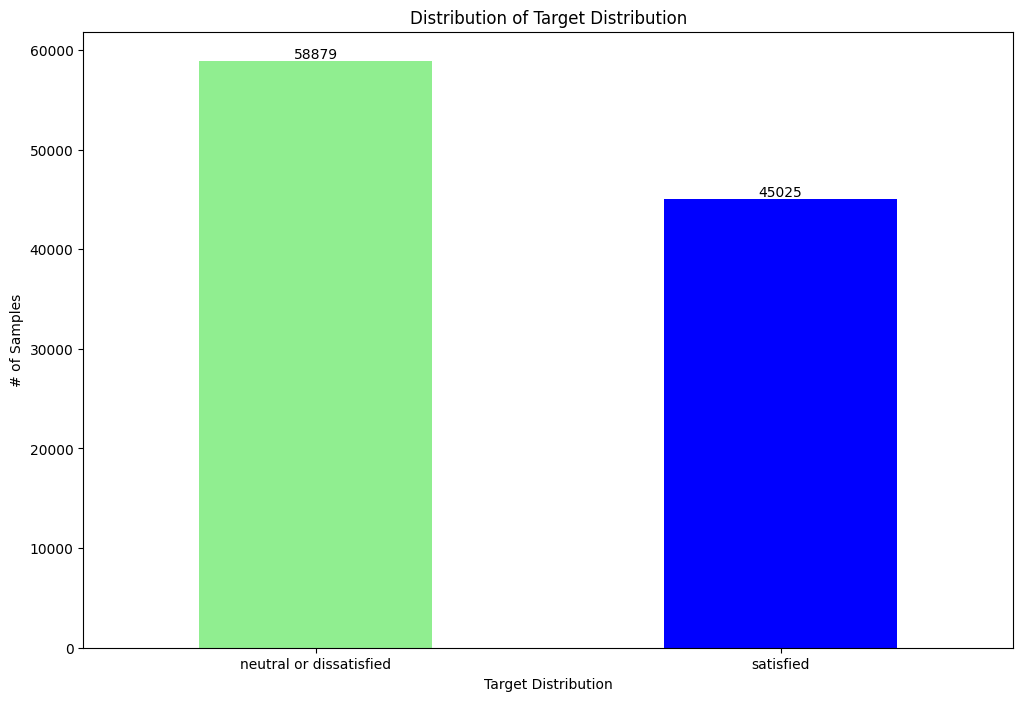

In [12]:
barplot_visual(data["target"],
               "Distribution of Target Distribution",
               "Target Distribution",
               "# of Samples",
               )

#### Dataset Visualization: Inflight WiFi Service

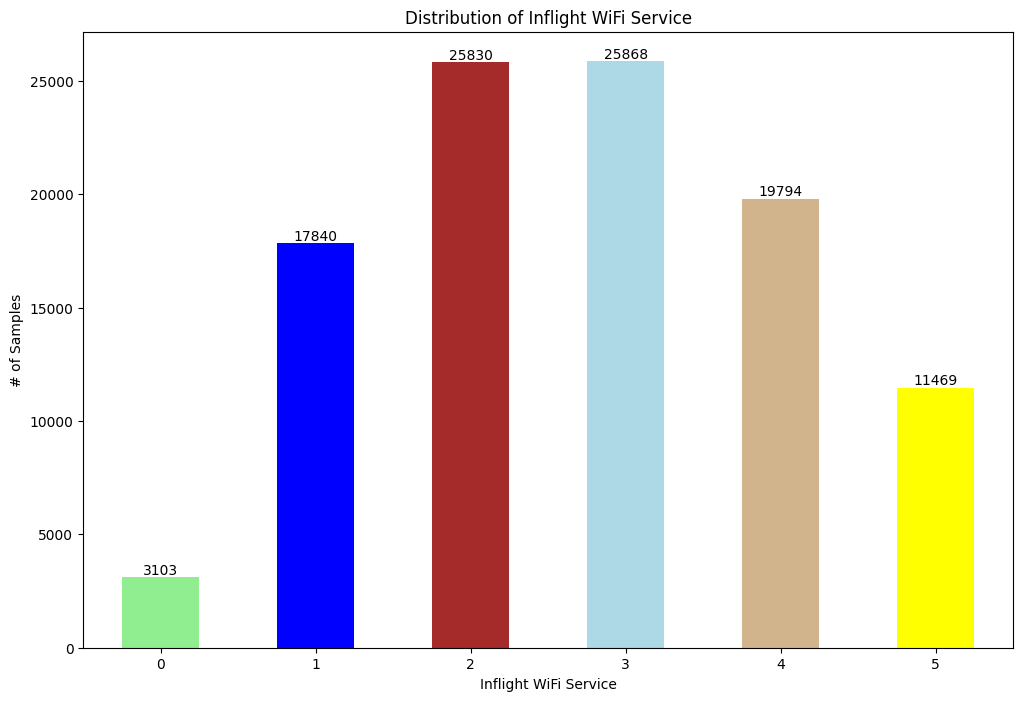

In [13]:
barplot_visual(data["inflight_wifi"],
               "Distribution of Inflight WiFi Service",
               "Inflight WiFi Service",
               "# of Samples",
               )

#### Dataset Visualization: Departure/Arrival Time Convenience

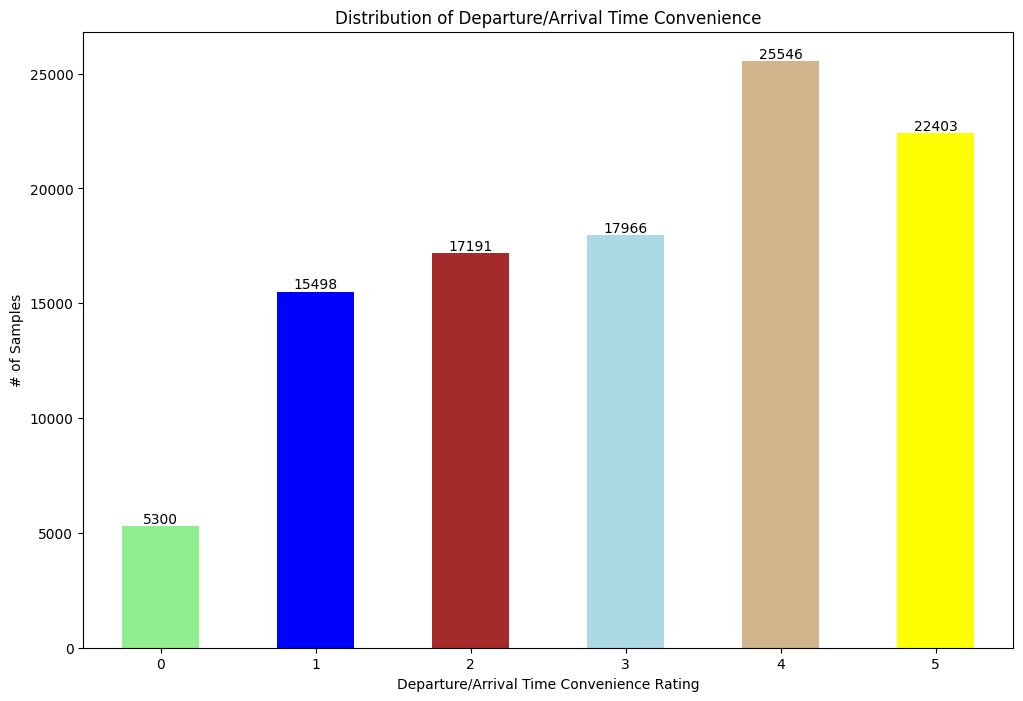

In [14]:
barplot_visual(data["departure_arrival_time_convenient"],
               "Distribution of Departure/Arrival Time Convenience",
               "Departure/Arrival Time Convenience Rating",
               "# of Samples",
               )

#### Dataset Visualization: Ease of Online Booking

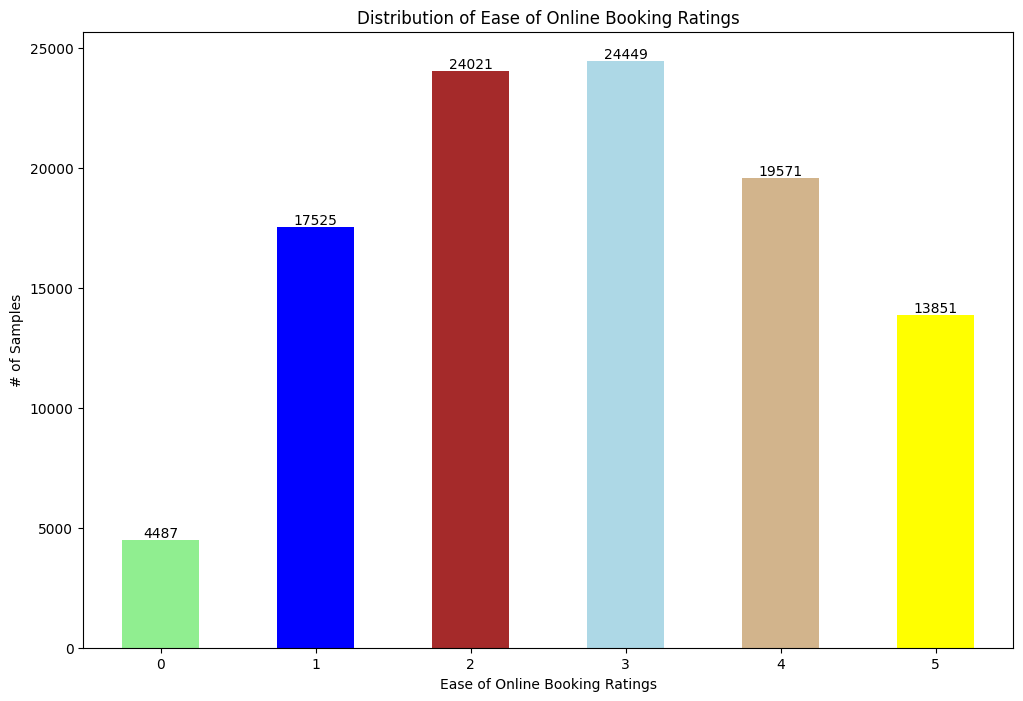

In [15]:
barplot_visual(data["ease_of_online_booking"],
               "Distribution of Ease of Online Booking Ratings",
               "Ease of Online Booking Ratings",
               "# of Samples",
               )

#### Dataset Visualization: Gate Location Rating

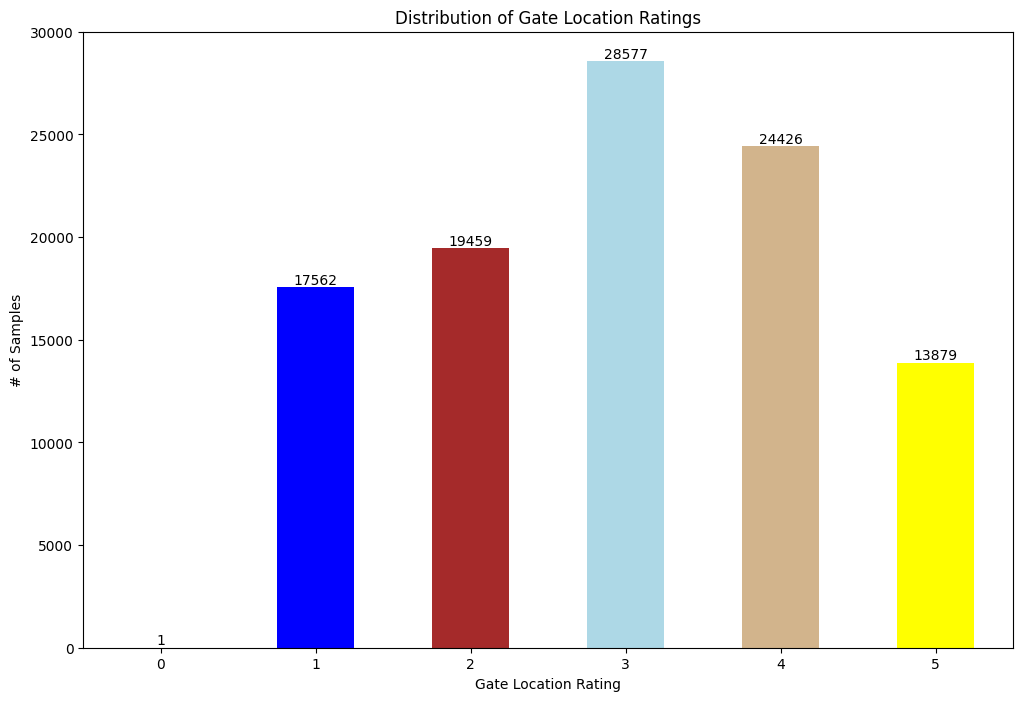

In [16]:
barplot_visual(data["gate_location"],
               "Distribution of Gate Location Ratings",
               "Gate Location Rating",
               "# of Samples",
               )

#### Dataset Visualization: Food & Drink Rating

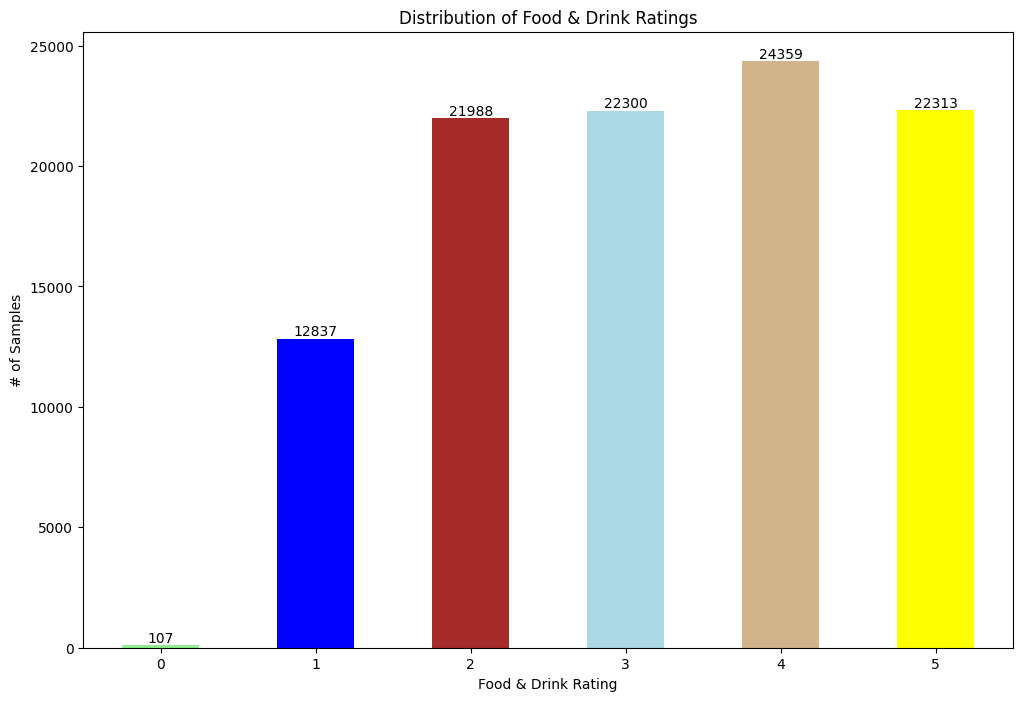

In [17]:
barplot_visual(data["food_n_drink"],
               "Distribution of Food & Drink Ratings",
               "Food & Drink Rating",
               "# of Samples",
               )

#### Dataset Visualization: Online Boarding

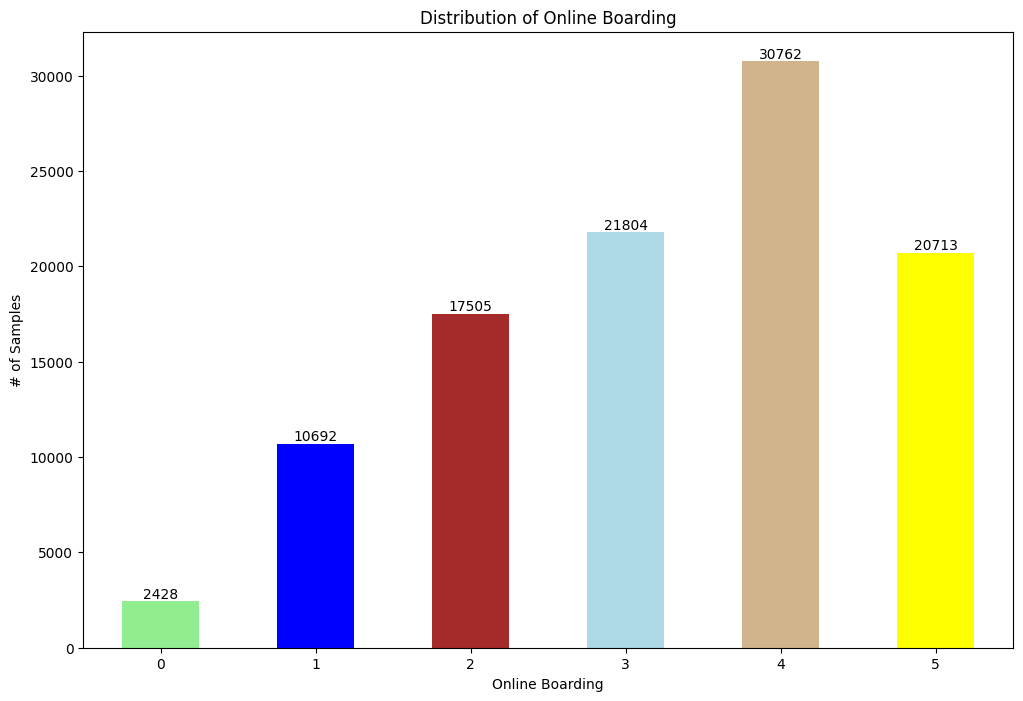

In [18]:
barplot_visual(data["online_boarding"],
               "Distribution of Online Boarding",
               "Online Boarding",
               "# of Samples",
               )

#### Dataset Visualization: Seat Comfort

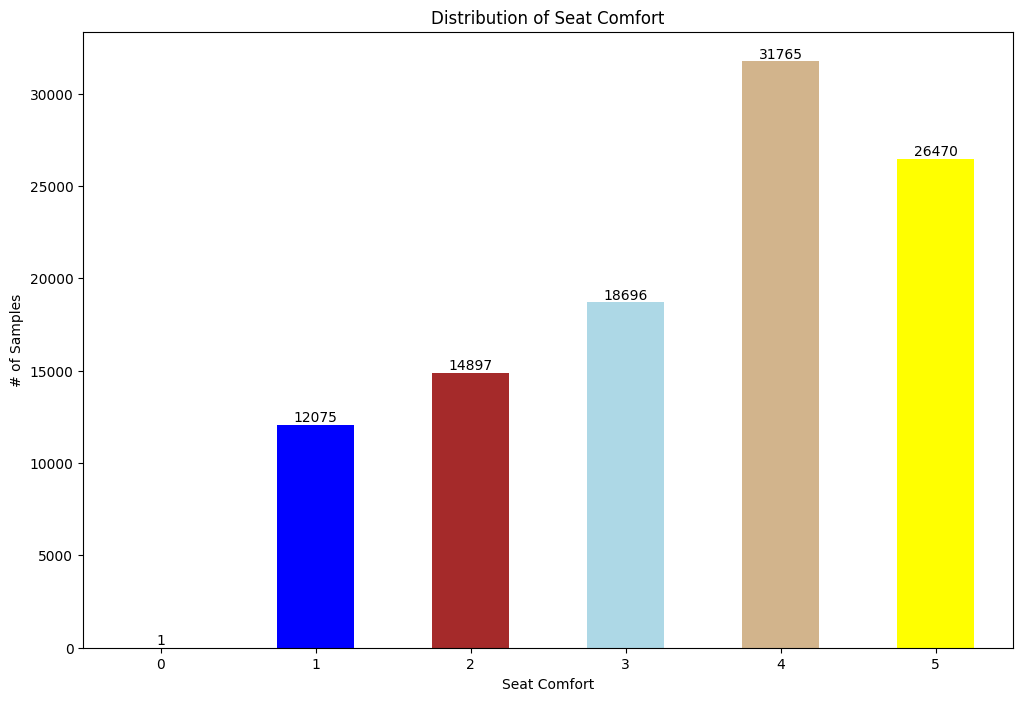

In [19]:
barplot_visual(data["seat_comfort"],
               "Distribution of Seat Comfort",
               "Seat Comfort",
               "# of Samples",
               )

#### Dataset Visualization: Inflight Entertainment

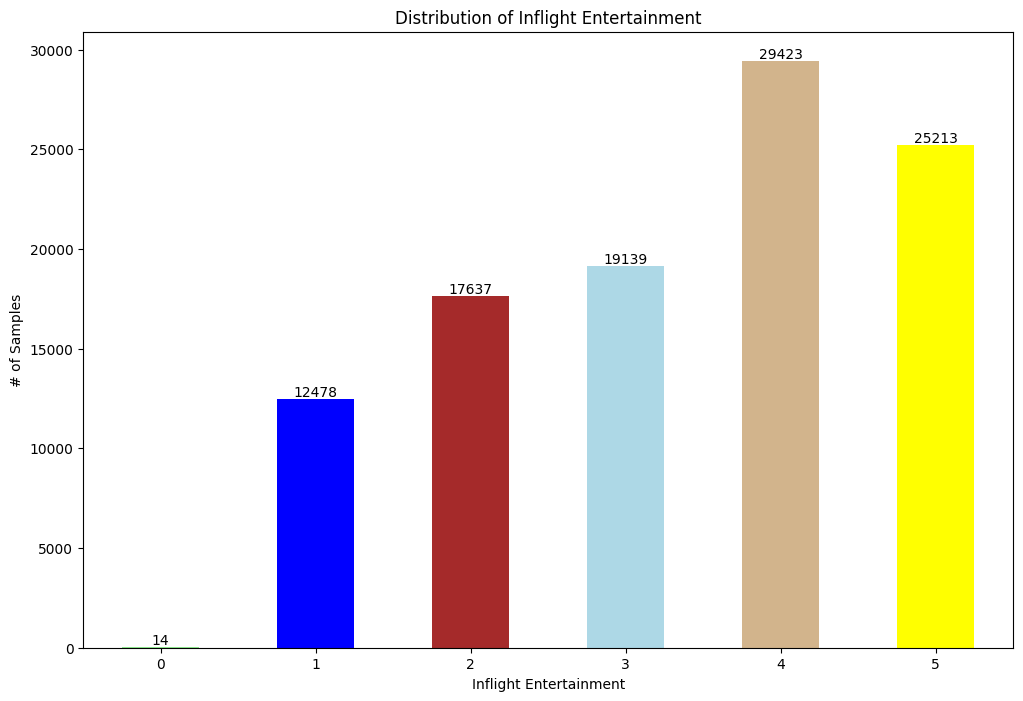

In [20]:
barplot_visual(data["inflight_entertainment"],
               "Distribution of Inflight Entertainment",
               "Inflight Entertainment",
               "# of Samples",
               )

#### Dataset Visualization: On-Board Service

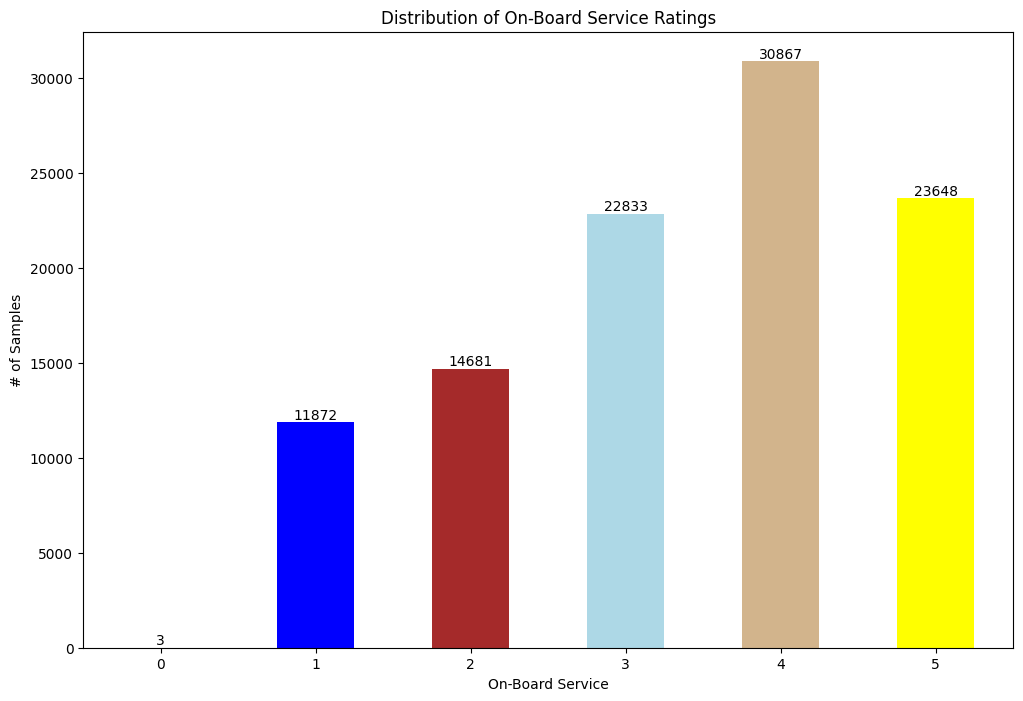

In [21]:
barplot_visual(data["on_board_service"],
               "Distribution of On-Board Service Ratings",
               "On-Board Service",
               "# of Samples",
               )

#### Dataset Visualization: Leg Room Service Ratings

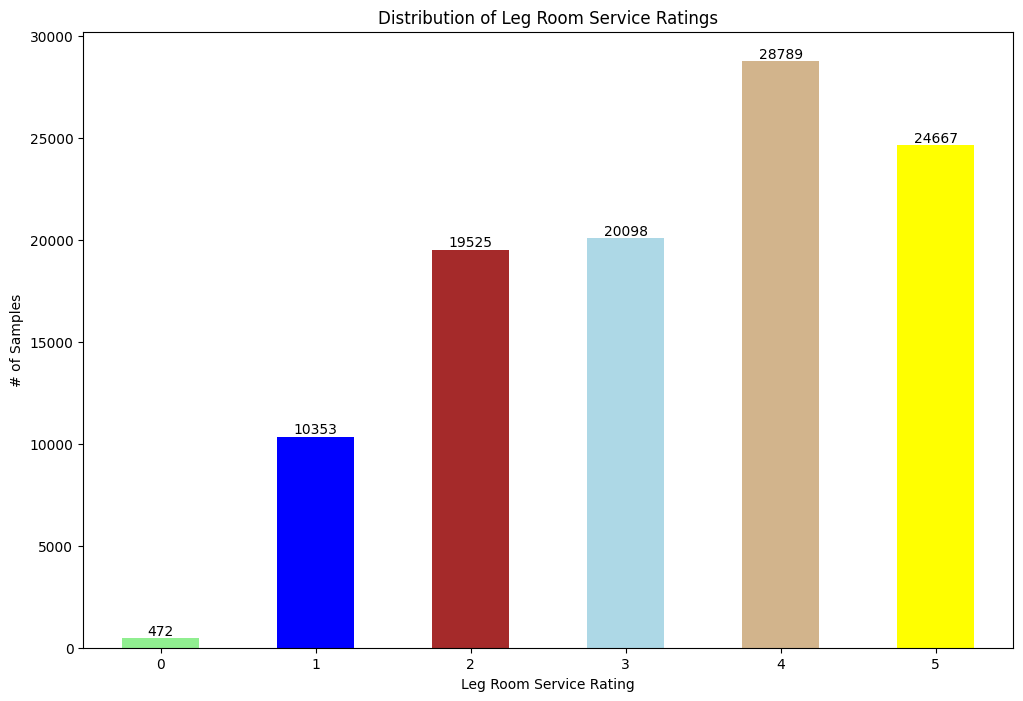

In [22]:
barplot_visual(data["leg_room_service"],
               "Distribution of Leg Room Service Ratings",
               "Leg Room Service Rating",
               "# of Samples",
               )

#### Dataset Visualization: Baggage Handling Ratings

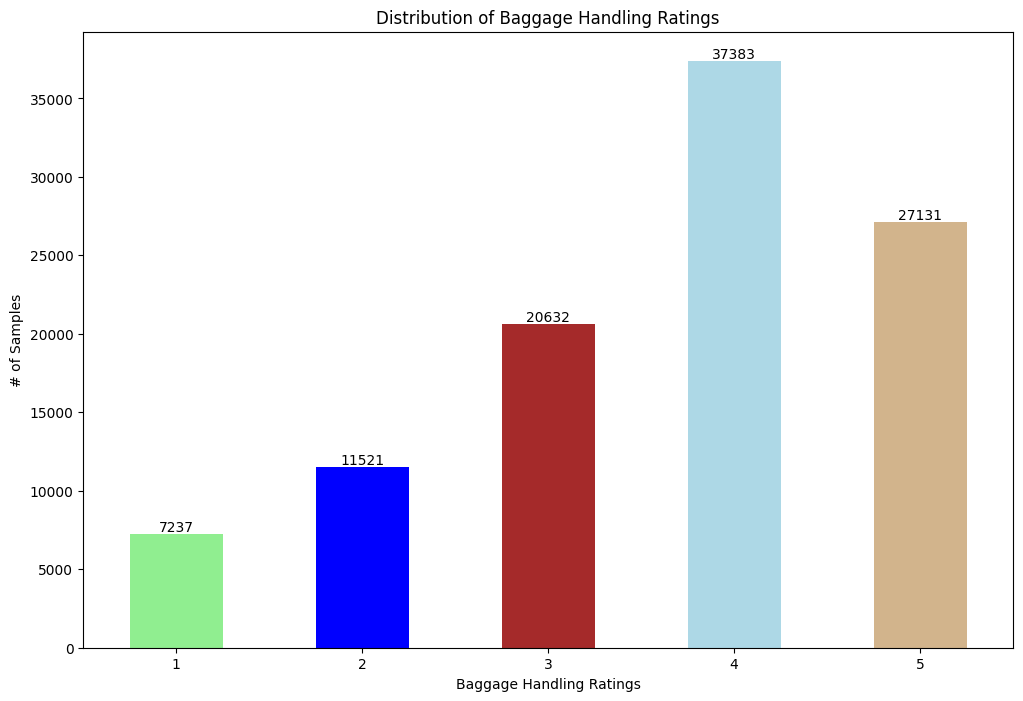

In [23]:
barplot_visual(data["baggage_handling"],
               "Distribution of Baggage Handling Ratings",
               "Baggage Handling Ratings",
               "# of Samples",
               )

#### Dataset Visualization: Checkin Service

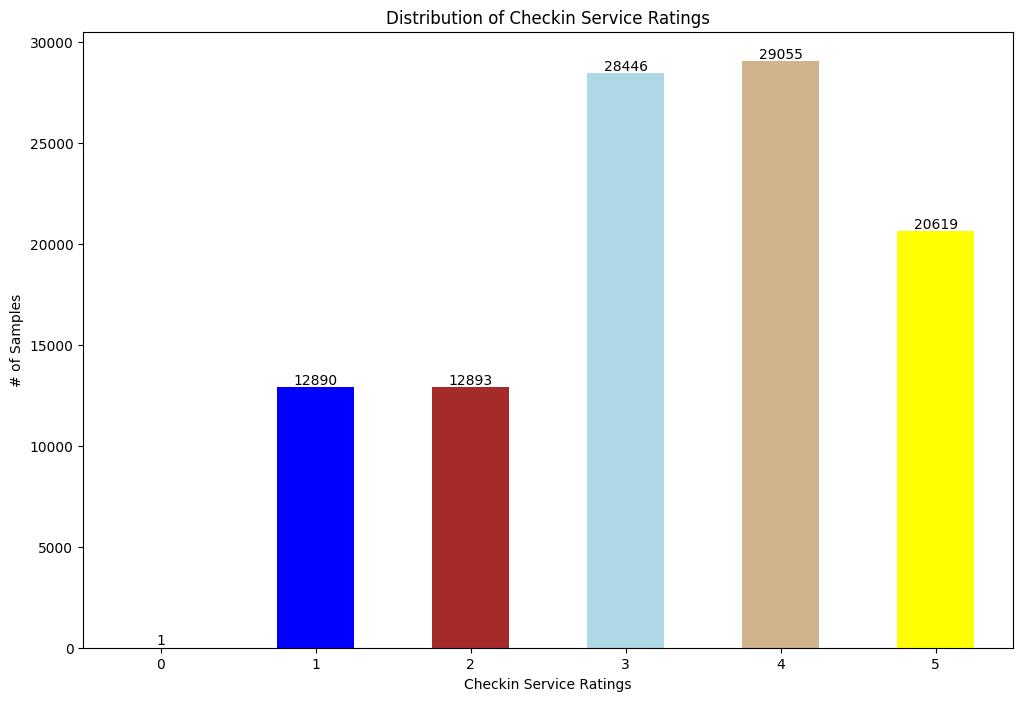

In [24]:
barplot_visual(data["checkin_service"],
               "Distribution of Checkin Service Ratings",
               "Checkin Service Ratings",
               "# of Samples",
               )

#### Dataset Visualization: Inflight Service Ratings

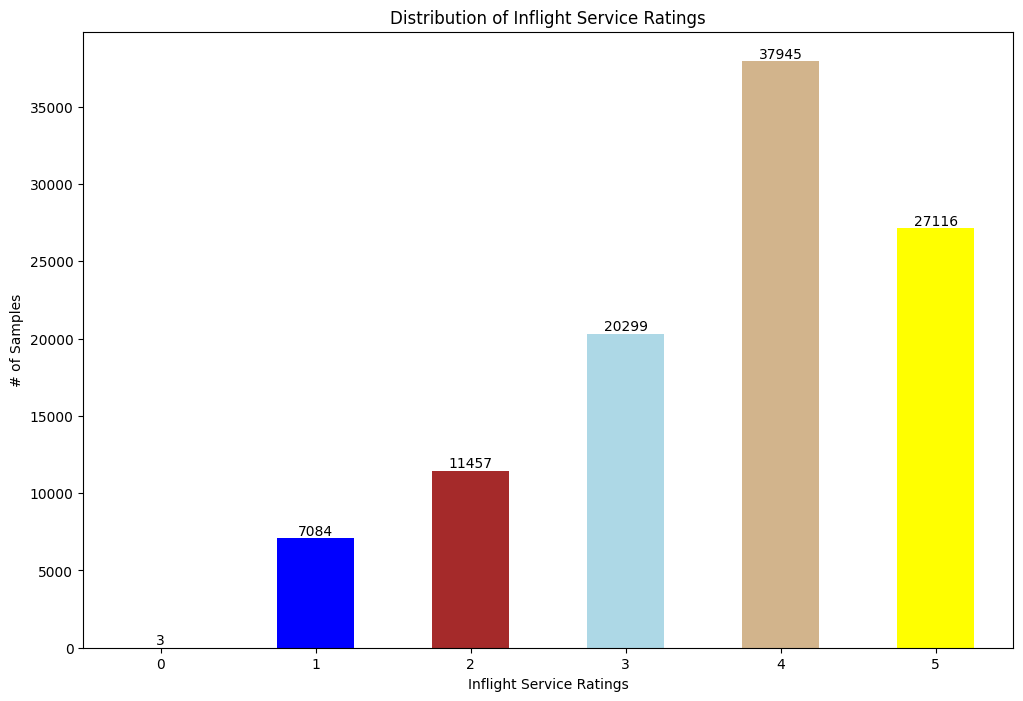

In [25]:
barplot_visual(data["inflight_service"],
               "Distribution of Inflight Service Ratings",
               "Inflight Service Ratings",
               "# of Samples",
               )

#### Dataset Visualization: Cleanliness

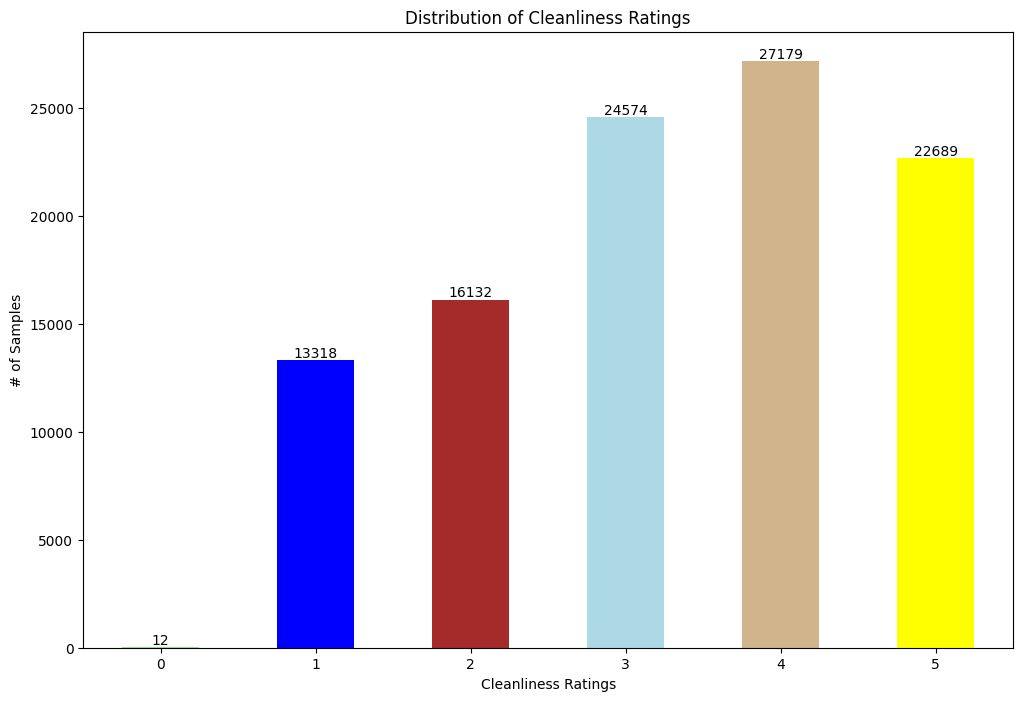

In [26]:
barplot_visual(data["cleanliness"],
               "Distribution of Cleanliness Ratings",
               "Cleanliness Ratings",
               "# of Samples",
               )

#### Dataset Visualization: Target Distribution

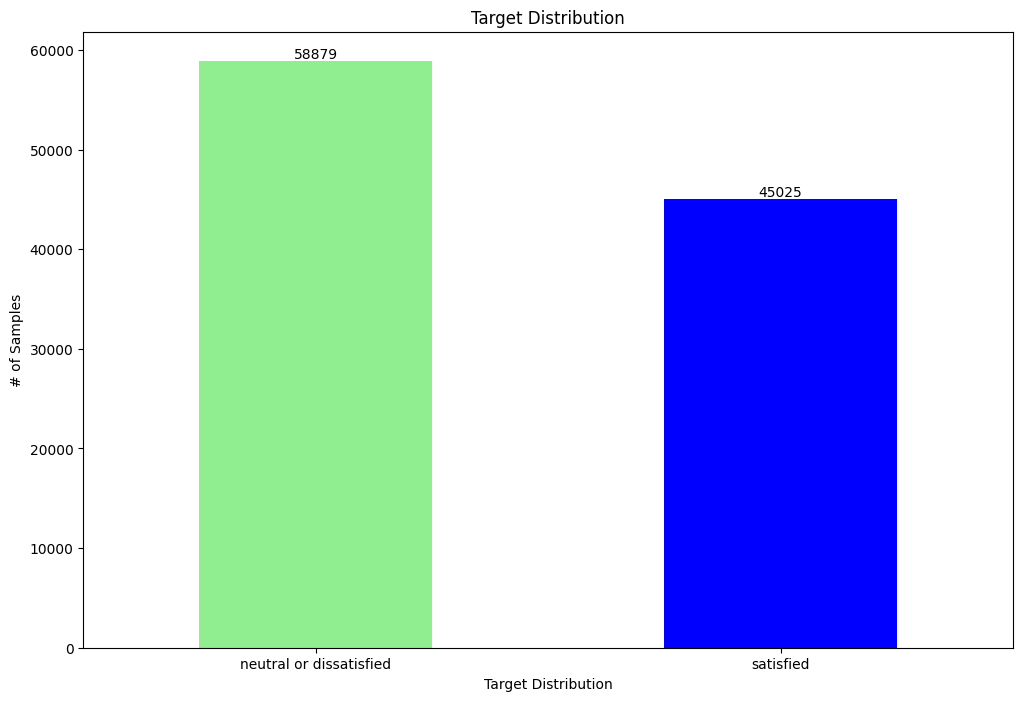

In [27]:
barplot_visual(data["target"],
               "Target Distribution",
               "Target Distribution",
               "# of Samples",
               )

#### Create Function to Visualize Features (Histograms)

In [28]:
def histogram_visual(feature_to_visualize: pd.Series,
                     num_of_bins: int,
                     plot_title: str,
                     x_label: str,
                     x_start: float = -1.0,
                     y_label: str = "# of Samples",
                     ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - x_start: To force the x-axis of the visual to start at
    a specified value instead of the automatically generated
    value, assign the float value here. Otherwise, the
    autogenerated start value will be used.
    - y_label: The string label value for the y label.

    Output:
    - A histogram.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(x_start) != 'float', \
        "The x_start value must be a float value."

    ax = feature_to_visualize.hist(grid=False,
                                   bins=num_of_bins,
                                   figsize=(18, 8))
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    if x_start != -1:
        plt.xlim([0, (max(feature_to_visualize) + (1/num_of_bins))])

    plt.show()

#### Dataset Visualization: Age

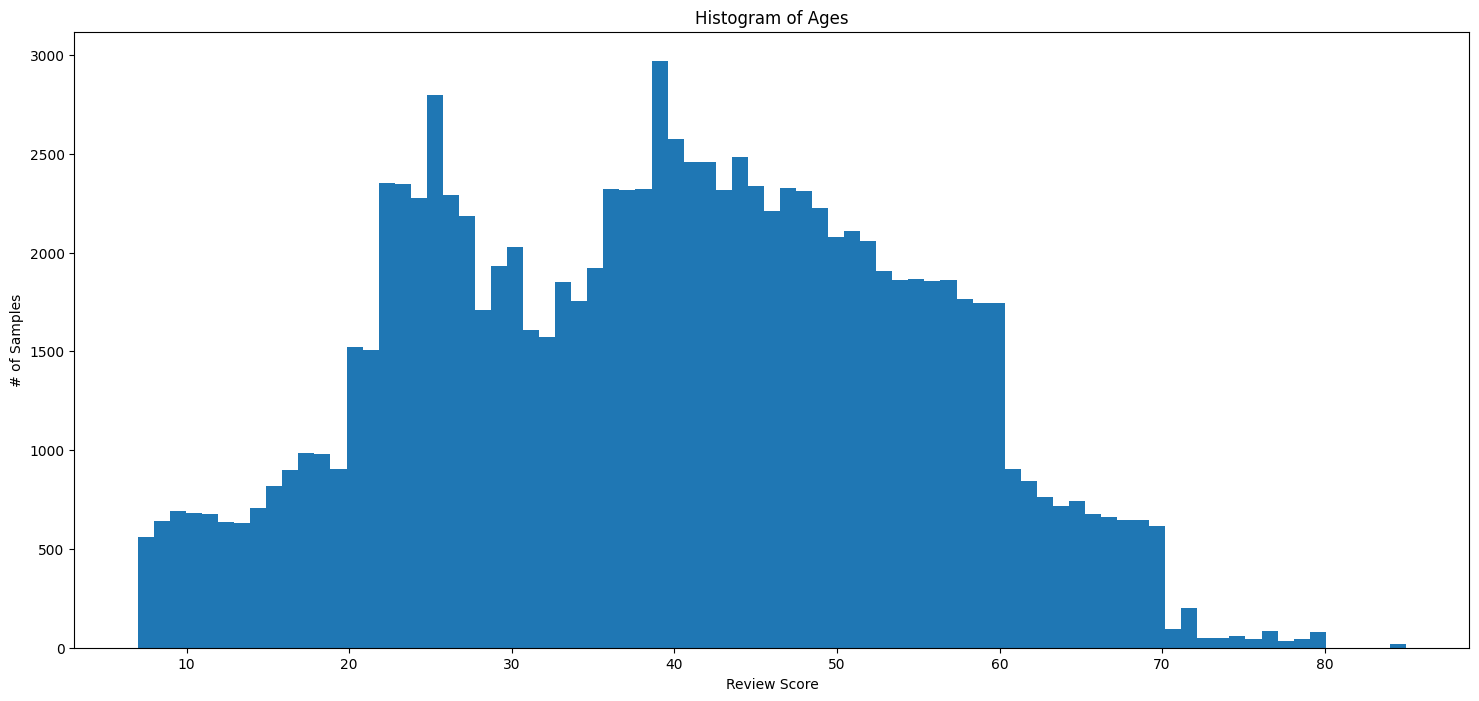

Ages range is 7 to 85 years old.


In [29]:
histogram_visual(data['age'],
                 num_of_bins=79,
                 plot_title="Histogram of Ages",
                 x_label="Review Score")

print(f"Ages range is {min(data['age'])} to" +
      f" {max(data['age'])} years old.")

#### Dataset Visualization: Flight Distance

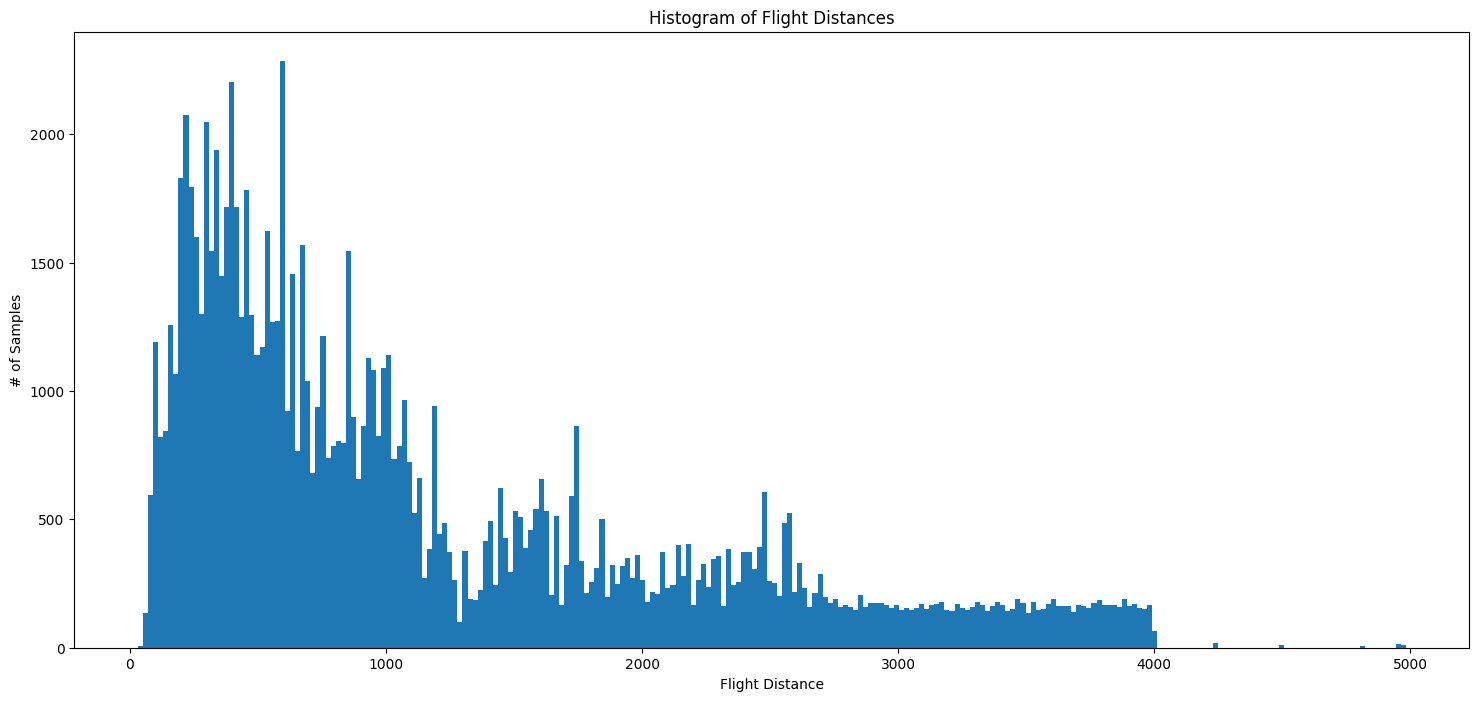

Flight distances range from 31.0 to 4983.0 miles.


In [30]:
histogram_visual(data['flight_distance'],
                 num_of_bins=250,
                 plot_title="Histogram of Flight Distances",
                 x_label="Flight Distance")

print(f"Flight distances range from " +
      f"{min(data['flight_distance'])} to " +
      f"{max(data['flight_distance'])} miles.")

#### Dataset Visualization: Departure Delay

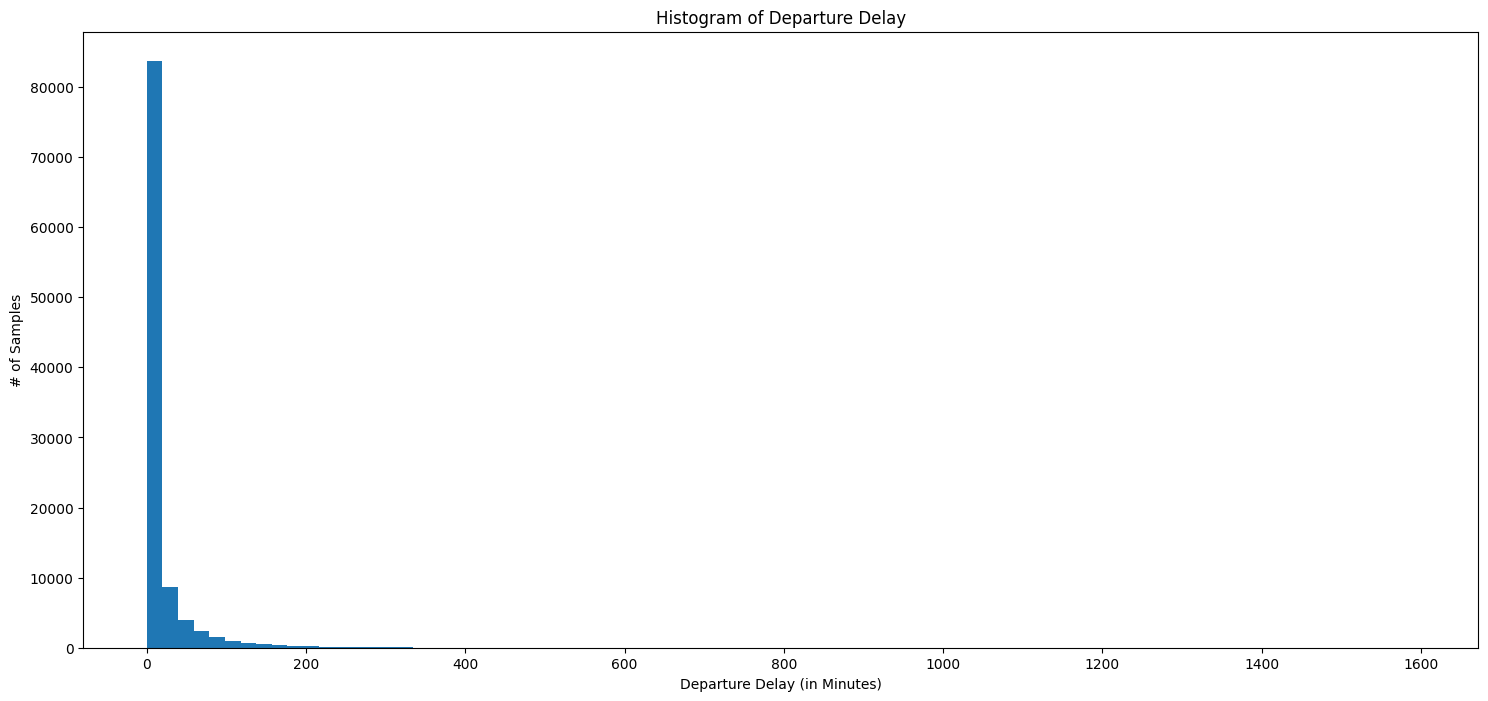

Departure Delays range from 0 to 1592 minutes.


In [31]:
histogram_visual(data['departure_delay_in_minutes'],
                 num_of_bins=81,
                 plot_title="Histogram of Departure Delay",
                 x_label="Departure Delay (in Minutes)")

print(f"Departure Delays range from " +
      f"{min(data['departure_delay_in_minutes'])} to " +
      f"{max(data['departure_delay_in_minutes'])} minutes.")

#### Dataset Visualization: Arrival Delays

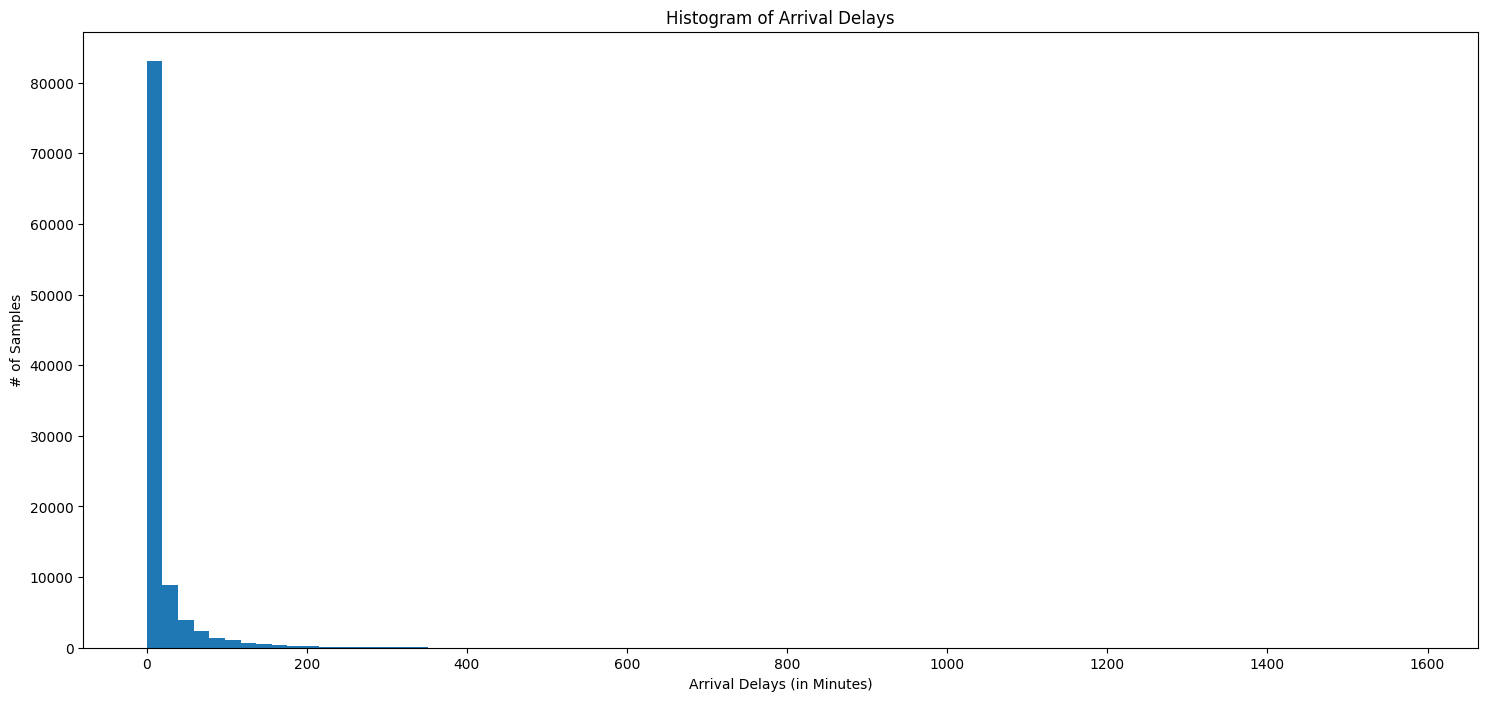

Arrival delays range from 0 to 1592 minutes.


In [32]:
histogram_visual(data['arrival_delay_in_minutes'],
                 num_of_bins=81,
                 plot_title="Histogram of Arrival Delays",
                 x_label="Arrival Delays (in Minutes)")

print(f"Arrival delays range from " +
      f"{min(data['departure_delay_in_minutes'])} to " +
      f"{max(data['departure_delay_in_minutes'])} minutes.")

#### Convert Label Values From String to Integer

In [33]:
UNIQUE_LABEL_VALUES = data['target'].unique()

label2id = {'satisfied': 0,
            'neutral or dissatisfied': 1}

data['target'] = data['target']\
    .replace(label2id)\
    .astype(np.int8)

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [34]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,gender,customer_type,age,travel_type,seating_class,flight_distance,inflight_wifi,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,target
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,39.379706,NaN,NaN,1189.448364,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178679,0.566667
std,NaN,NaN,15.114964,NaN,NaN,997.147278,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698681,0.495538
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,NaN,NaN,8.000000,NaN,NaN,101.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,NaN,NaN,20.000000,NaN,NaN,236.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [35]:
y = data['target']
X = data.drop(columns=['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training Input Dataset Shape: {X_train.shape}")
print(f"Training Output Dataset Shape: {y_train.shape}")

print(f"Evaluation Input Dataset Shape: {X_test.shape}")
print(f"Evaluation Output Dataset Shape: {y_test.shape}")

Training Input Dataset Shape: (77928, 22)
Training Output Dataset Shape: (77928,)
Evaluation Input Dataset Shape: (25976, 22)
Evaluation Output Dataset Shape: (25976,)


#### Metrics Evaluation Method

In [36]:
def metrics_evaluation(classifier_type,
                       y_test,
                       y_pred_cv):

    print("+-------------------------------------------------------------------------+")
    print("|  " + ("Confusion Matrix for " + classifier_type).center(69) + "  |")
    print("+-------------------------------------------------------------------------+")

    cm = confusion_matrix(y_test,
                          y_pred_cv)

    display_cm = ConfusionMatrixDisplay(cm,
                                        display_labels=UNIQUE_LABEL_VALUES
                                        )

    display_cm.plot()
    plt.show()

    print("+-----------------------------------------------------+")
    print("|  " + ("Classification Report for " + classifier_type).center(49) + "  |")
    print("+-----------------------------------------------------+")

    print(classification_report(y_test,
                                y_pred_cv,
                                zero_division=0,
                                target_names=UNIQUE_LABEL_VALUES
                                )
          )

### Auto-Sklearn Classifier

#### Define Pipeline/Model

In [37]:
auto_sklearn_clf = AutoSklearnClassifier()

#### Fit Auto-Sklearn Classifier to Dataset

In [38]:
auto_sklearn_model = auto_sklearn_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column gender has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column customer_type has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column travel_type has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column seating_class has generic type object. Autosklearn will treat this column as string. Pleas

#### Generate Predictions

In [39]:
predictions = auto_sklearn_model.predict(X_test)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|               Confusion Matrix for Auto-Sklearn Classifier              |
+-------------------------------------------------------------------------+


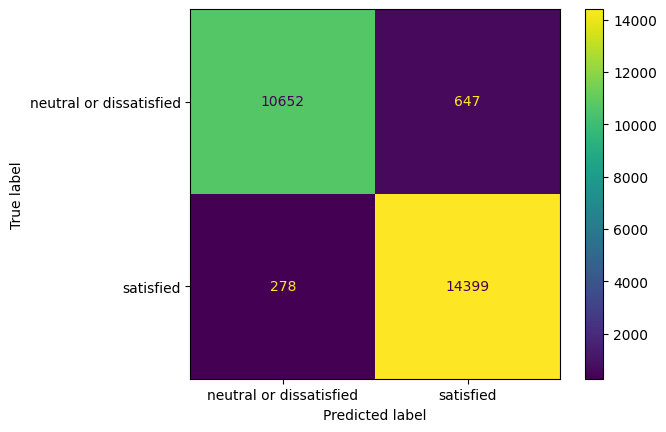

+-----------------------------------------------------+
|  Classification Report for Auto-Sklearn Classifier  |
+-----------------------------------------------------+
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.94      0.96     11299
              satisfied       0.96      0.98      0.97     14677

               accuracy                           0.96     25976
              macro avg       0.97      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



In [41]:
metrics_evaluation("Auto-Sklearn Classifier",
                       y_test,
                       predictions)

### Notes & Other Takeaways From This Project
****
- The results are fantastic. 
- From the results of this project, I have learned to assign a data type of 'category' instead of str to features that are of string data type.
****

### Citations

- Auto-Sklearn
    > @inproceedings{feurer-neurips15a, title = {Efficient and Robust Automated Machine Learning}, author = {Feurer, Matthias and Klein, Aaron and Eggensperger, Katharina and Springenberg, Jost and Blum, Manuel and Hutter, Frank}, booktitle = {Advances in Neural Information Processing Systems 28 (2015)}, pages = {2962--2970}, year = {2015}}

    > @article{feurer-arxiv20a, title = {Auto-Sklearn 2.0: Hands-free AutoML via Meta-Learning}, author = {Feurer, Matthias and Eggensperger, Katharina and Falkner, Stefan and Lindauer, Marius and Hutter, Frank}, journal = {arXiv:2007.04074 [cs.LG]}, year = {2020},}